In [3]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
import pandas as pd
pd.read_csv(r'C:\Users\SUDHANSHU\Downloads\sonar.all-data')

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [16]:
main_df = pd.read_csv(r'C:\Users\SUDHANSHU\Downloads\sonar.all-data',header=None)
main_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


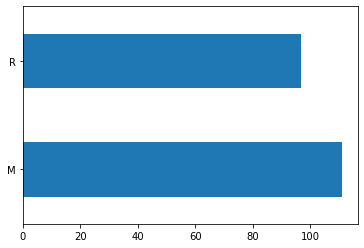

In [17]:
main_df[60].value_counts().plot(kind='barh')

In [18]:
inputs_df = main_df.drop(60, axis=1)
inputs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [19]:
targets_df = pd.get_dummies(main_df[60])
targets_df

,M,R
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
203,1,0
204,1,0
205,1,0
206,1,0


In [20]:
rock_y_df = targets_df['R']
mine_y_df = targets_df['M']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_df, mine_y_df, test_size=0.30, random_state=42)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# For feature creation
poly = PolynomialFeatures(2)

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

In [26]:
classifiers_ = [
    ("AdaBoost",AdaBoostClassifier()),
    ("Decision Tree", DecisionTreeClassifier(max_depth=10)),
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Linear SVM", SVC(kernel="linear", C=0.025,probability=True)),
    ("Naive Bayes",GaussianNB()),
    ("Nearest Neighbors",KNeighborsClassifier(3)),
    ("Neural Net",MLPClassifier(alpha=1)),
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("Random Forest",RandomForestClassifier(n_jobs=2, random_state=1)),
    ("RBF SVM",SVC(gamma=2, C=1,probability=True)),
    ("SGDClassifier", SGDClassifier(max_iter=1000, tol=10e-3,penalty='elasticnet'))
    ]

In [27]:
clf_names = []
train_scores = []
test_scores = []
for n,clf in classifiers_:
    clf_names.append(n)
    # Model declaration with pipeline
    clf = Pipeline([('POLY', poly),('CLF',clf)])
    
    # Model training
    clf.fit(X_train, y_train)
    print(n+" training done!")
    
    # Measure training accuracy and score
    train_scores.append(clf.score(X_train, y_train))
    print(n+" training score done!")
    
    # Measure test accuracy and score
    test_scores.append(clf.score(X_test, y_test))
    print(n+" testing score done!")
    print("---")

AdaBoost training done!
AdaBoost training score done!
AdaBoost testing score done!
---
Decision Tree training done!
Decision Tree training score done!
Decision Tree testing score done!
---
Gaussian Process training done!
Gaussian Process training score done!
Gaussian Process testing score done!
---
Linear SVM training done!
Linear SVM training score done!
Linear SVM testing score done!
---
Naive Bayes training done!
Naive Bayes training score done!
Naive Bayes testing score done!
---
Nearest Neighbors training done!
Nearest Neighbors training score done!
Nearest Neighbors testing score done!
---
Neural Net training done!
Neural Net training score done!
Neural Net testing score done!
---
QDA training done!
QDA training score done!
QDA testing score done!
---
Random Forest training done!
Random Forest training score done!
Random Forest testing score done!
---
RBF SVM training done!
RBF SVM training score done!
RBF SVM testing score done!
---
SGDClassifier training done!
SGDClassifier tra

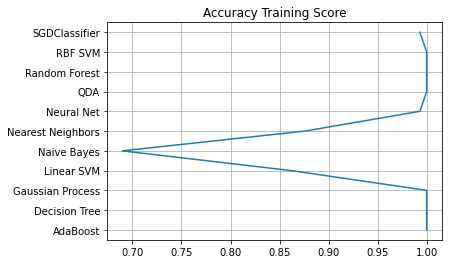

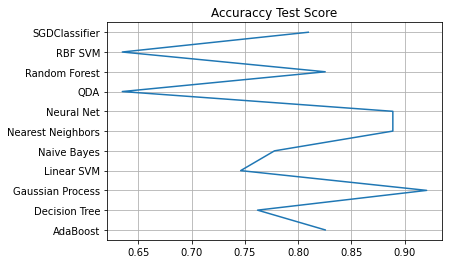

In [28]:
#Plot results
plt.title('Accuracy Training Score')
plt.grid()
plt.plot(train_scores,clf_names)
plt.show()

plt.title('Accuraccy Test Score')
plt.grid()
plt.plot(test_scores,clf_names)
plt.show()

In [29]:
rng = np.random.RandomState(1)

clf = GaussianProcessClassifier(1.0 * RBF(1.0))

clf = Pipeline([('POLY', poly),
                ('ADABOOST', clf)])

# Training our model
%time clf.fit(X_train, y_train)

Wall time: 975 ms


Pipeline(steps=[('POLY', PolynomialFeatures()),
                ('ADABOOST',
                 GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1)))])

In [30]:
clf.score(X_train, y_train)

1.0

In [31]:
clf.score(X_test, y_test)

0.9206349206349206

In [32]:
clf.predict(X_test).sum()

38

In [33]:
y_test.sum()

35

Train results: confusion matrix
[[69  0]
 [ 0 76]]


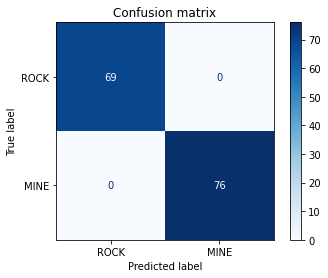

In [34]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_train, y_train,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print('Train results: confusion matrix')
print(disp.confusion_matrix)

Test results: confusion matrix
[[24  4]
 [ 1 34]]


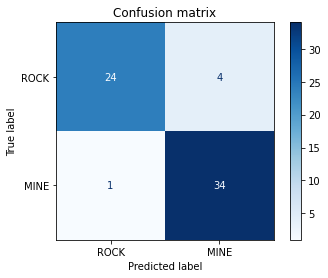

In [35]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print('Test results: confusion matrix')
print(disp.confusion_matrix)